In [46]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Dropout, Flatten

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import zipfile

In [30]:
train_dir = 'data/train/'
test_dir = 'data/test1/'

In [31]:
train_data = os.listdir(train_dir)
categories = []
for file in train_data:
    category = file.split('.')[0]
    if category == 'dog':
        categories.append('dog')
    else:
        categories.append('cat')
df = pd.DataFrame({'filename' : train_data, 
                   'category' : categories})
df

,filename,category
0,dog.3064.jpg,dog
1,dog.624.jpg,dog
2,dog.1662.jpg,dog
3,cat.12431.jpg,cat
4,dog.3350.jpg,dog
...,...,...
24995,dog.3852.jpg,dog
24996,dog.6171.jpg,dog
24997,dog.2205.jpg,dog
24998,dog.11558.jpg,dog


In [32]:
print('No. of cat images: ',len(df[df['category'] == 'cat']))
print('No. of cat images: ',len(df[df['category'] == 'dog']))

No. of cat images:  12500
No. of cat images:  12500


In [33]:
model = Sequential()

# 3 Convolutional, Pooling, Dropout layers
model.add(Conv2D(8, 
                 (3,3), 
                 activation = 'relu', 
                 input_shape = (150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(16, 
                 (3, 3),
                 activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(32, 
                 (3,3), 
                 activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Dense layers start
model.add(Flatten())

model.add(Dense(1024, 
                activation = 'relu'))
model.add(Dropout(0.45))

model.add(Dense(256, 
                activation = 'tanh'))
model.add(Dropout(0.45))

model.add(Dense(2, 
                activation = 'sigmoid'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 8)       224       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 8)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 16)        1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)       

In [35]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

In [36]:
train_df, val_df = train_test_split(df, 
                                    test_size = 0.25)
train_df = train_df.reset_index(drop = True)
val_df = val_df.reset_index(drop = True)

In [37]:
print("Train size: ", len(train_df))
print("Validation size: ", len(val_df))

Train size:  18750
Validation size:  6250


In [38]:
print("Dogs in train set: ", len(train_df[train_df['category'] == 'dog']))
print("Cats in train set: ", len(train_df[train_df['category'] == 'cat']))
print("Dogs in validation set: ", len(val_df[val_df['category'] == 'dog']))
print("Cats in validation set: ", len(val_df[val_df['category'] == 'cat']))

Dogs in train set:  9373
Cats in train set:  9377
Dogs in validation set:  3127
Cats in validation set:  3123


In [39]:
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_dataframe(train_df, 
                                                    'data/train/', 
                                                    x_col = 'filename', 
                                                    y_col = 'category', 
                                                    target_size =(150, 150), 
                                                    class_mode = 'categorical', 
                                                    batch_size = 20, 
                                                    color_mode = 'rgb', 
                                                    shuffle = True)

val_generator = val_datagen.flow_from_dataframe(val_df, 
                                                    'data/train/', 
                                                    x_col = 'filename', 
                                                    y_col = 'category', 
                                                    target_size =(150, 150), 
                                                    class_mode = 'categorical', 
                                                    batch_size = 20, 
                                                    color_mode = 'rgb', 
                                                    shuffle = True)

Found 18750 validated image filenames belonging to 2 classes.
Found 6250 validated image filenames belonging to 2 classes.


In [40]:
history = model.fit(
    train_generator, 
    steps_per_epoch = len(train_df)//64, 
    epochs = 10, 
    validation_data = val_generator, 
    validation_steps = len(val_df)//64)

Epoch 1/10
292/292 [==============================] - 79s 264ms/step - loss: 0.7825 - accuracy: 0.5214 - val_loss: 0.6935 - val_accuracy: 0.4948
Epoch 2/10
292/292 [==============================] - 74s 253ms/step - loss: 0.6861 - accuracy: 0.5404 - val_loss: 0.6894 - val_accuracy: 0.5691
Epoch 3/10
292/292 [==============================] - 68s 233ms/step - loss: 0.6658 - accuracy: 0.5829 - val_loss: 0.5881 - val_accuracy: 0.6820
Epoch 4/10
292/292 [==============================] - 74s 255ms/step - loss: 0.5998 - accuracy: 0.6695 - val_loss: 0.6355 - val_accuracy: 0.6139
Epoch 5/10
292/292 [==============================] - 67s 229ms/step - loss: 0.5776 - accuracy: 0.6978 - val_loss: 0.6236 - val_accuracy: 0.6474
Epoch 6/10
292/292 [==============================] - 70s 239ms/step - loss: 0.5556 - accuracy: 0.7105 - val_loss: 0.5229 - val_accuracy: 0.7361
Epoch 7/10
292/292 [==============================] - 71s 243ms/step - loss: 0.5401 - accuracy: 0.7269 - val_loss: 0.5347 - val_ac

In [42]:
print('Training accuracy: {:.3f}'.format(history.history['accuracy'][-1]))
print('Validation accuracy: {:.3f}'.format(history.history['val_accuracy'][-1]))

Training accuracy: 0.771
Validation accuracy: 0.740


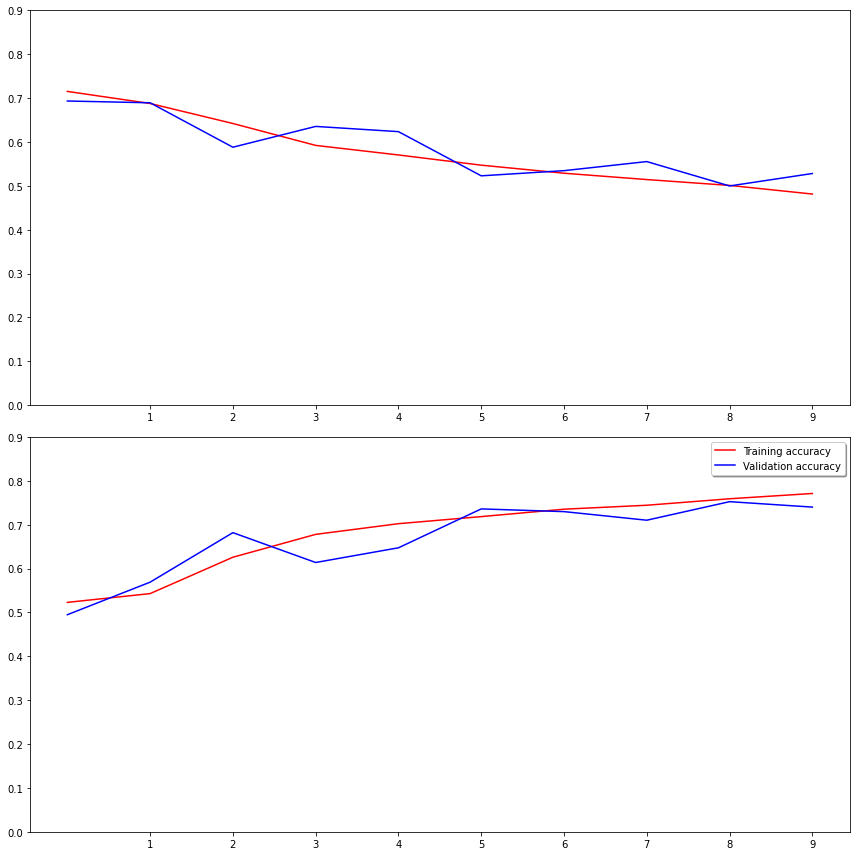

In [43]:
fig,(ax1, ax2) = plt.subplots(2, 1, figsize = (12,12))
ax1.plot(history.history["loss"], color= "red", label = "Training loss")
ax1.plot(history.history["val_loss"], color= "b", label = "Validation loss")

ax1.set_xticks(np.arange(1, 10, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history["accuracy"], color = "red", label = "Training accuracy")
ax2.plot(history.history["val_accuracy"], color = "b", label = "Validation accuracy")

ax2.set_xticks(np.arange(1,10, 1))
ax2.set_yticks(np.arange(0, 1, 0.1))

legend = plt.legend(loc = "best", shadow = True)
plt.tight_layout()
plt.show()

In [48]:
MODEL_DIR = './model'
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

INFO:tensorflow:Assets written to: ./model/1/assets


To copy model from container, run:

docker cp 6e83c3797f35:/tf/notebooks/cats_vs_dogs/model .

To build dockerfile, run:

docker build . -t tf_serving_image_cvsd

To run image, execute:

docker run -p 8501:8501 tf_serving_image_cvsd